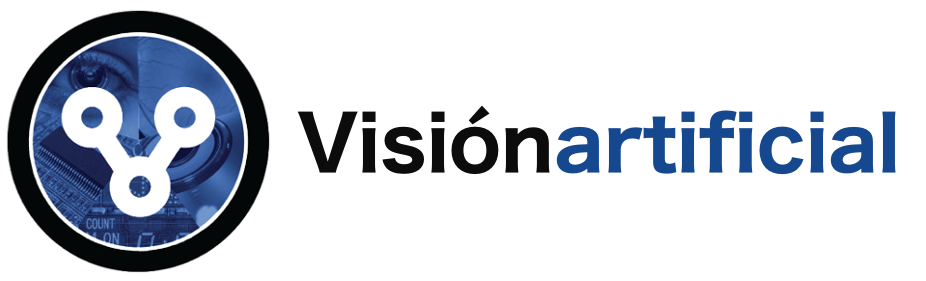

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos FAST</font>

O detector de puntos clave FAST foi introducido por primeira vez por Rosten e Drummond na International Conference on Computer Vision de 2005, no seu paper [Fusing points and lines for high performance tracking](./artigos/rosten_2005.pdf). Posteriormente, publicou versións melloradas que incluían aprendizaxe automática para a detección rápida de esquinas publicáronse no 2006,[Machine learning for high-speed corner detection](./artigos/rosten_2006.pdf) e en 2010, [FASTER and better: A machine learning approach to corner detection](./artigos/rosten_2010.pdf), respectivamente.

Este método é, sen dúbida, o detector de puntos clave máis sinxelo e intuitivo de entender, a excepción do detector de puntos clave denso. Tamén é un dos detectores máis rápidos, como o nome suxire.

FAST está implementado en OpenCV e emprégase en aplicacións en **tempo real** ou con dispositivos con recursos limitados onde non hai moito tempo de computación ou potencia para usar detectores de puntos clave máis avanzados.



## <font style="color:rgb(50,120,229)">Obxectivo:</font>

Comprender o detector de puntos clave FAST para a detección de esquinas.

## <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave FAST?</font>

A suposición xeral detrás do detector de punto clave **FAST** é que, para que un píxel se considere unha "esquina", debe haber polo menos **n píxeles contiguos** ao longo dun perímetro circular, con **radio r**, que sexan todos máis brillantes ou máis escuros que o píxel central por un **limiar t**.

Para comprender o detector de puntos clave FAST, mire a seguinte figura:

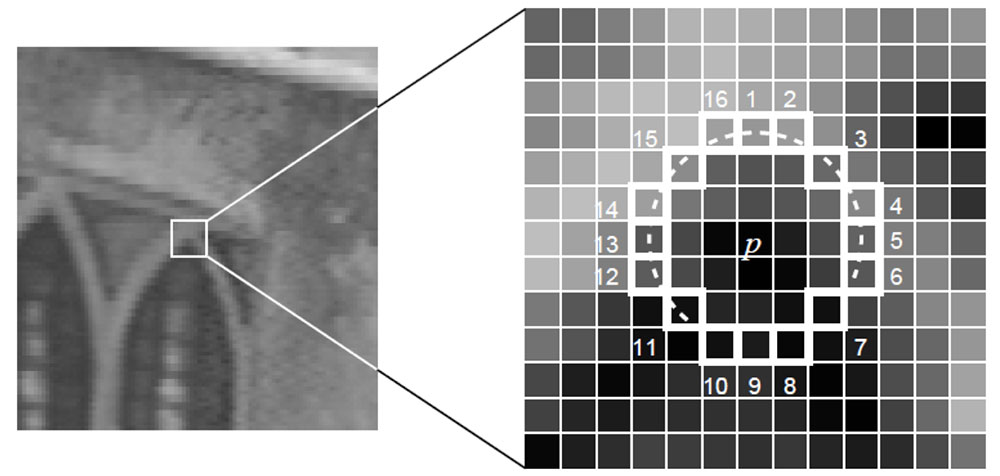

Figura 1: un exemplo do detector de puntos clave FAST que examina unha vecindade de 16 píxeles.

Na figura, estase considerando un círculo de 16 píxeles (que corresponde a un radio de **r = 3**) que rodea o píxel central. Para que este píxel central **p** poida considerarse un punto clave, debe haber **n píxeles** contiguos máis claros ou máis escuros que o píxel central según algún **limiar t**. Só probamos píxeles que caen ao longo do perímetro do círculo.

Na práctica, é común seleccionar un raio de **r = 3** píxeles, que corresponde a un círculo de 16 píxeles. Tamén é común escoller **n**, o número de píxeles contiguos, que sexa n = 9 ou n = 12.

Vexamos un exemplo:

Aquí decidindo se o píxel central **p** debe considerarse un punto clave ou non. Se o punto ten un valor de **p = 32** en intensidade de grises, considerarase punto clave se hai **n = 12** píxeles contiguos ao longo do límite do círculo que sexan máis brillantes que **p + t** ou máis escuros que **p - t**. Se para este exemplo tomaramos un valor de **t=16**, só hai 8 píxeles contiguos máis escuros (marcados con rectángulos verdes, todos os demais como rectángulos vermellos) que o píxel central; polo tanto, non é un punto clave.

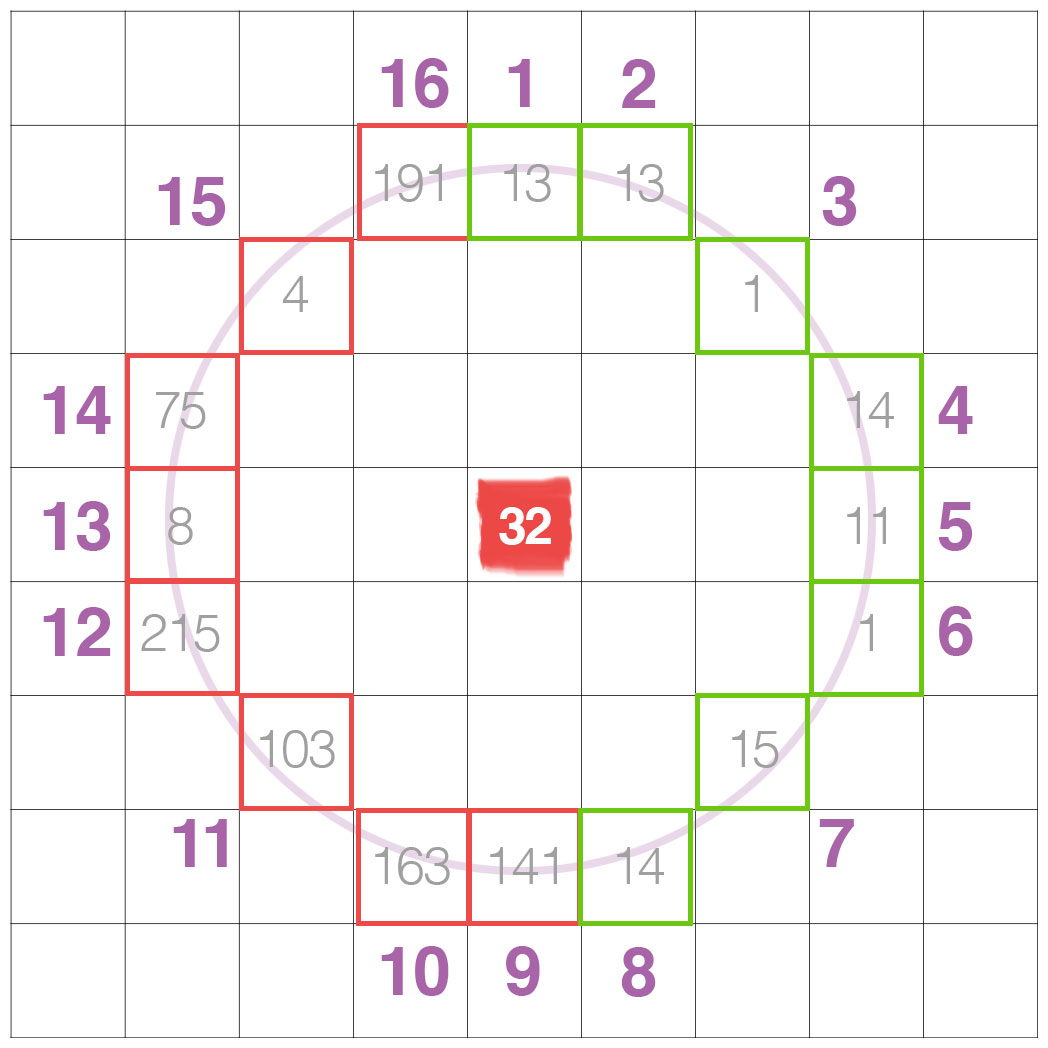
Figura 2: FAST non considera o punto central como clave porque só 8 píxeles contiguos son máis escuros que o píxel central.


Pero vexamos outro exemplo:

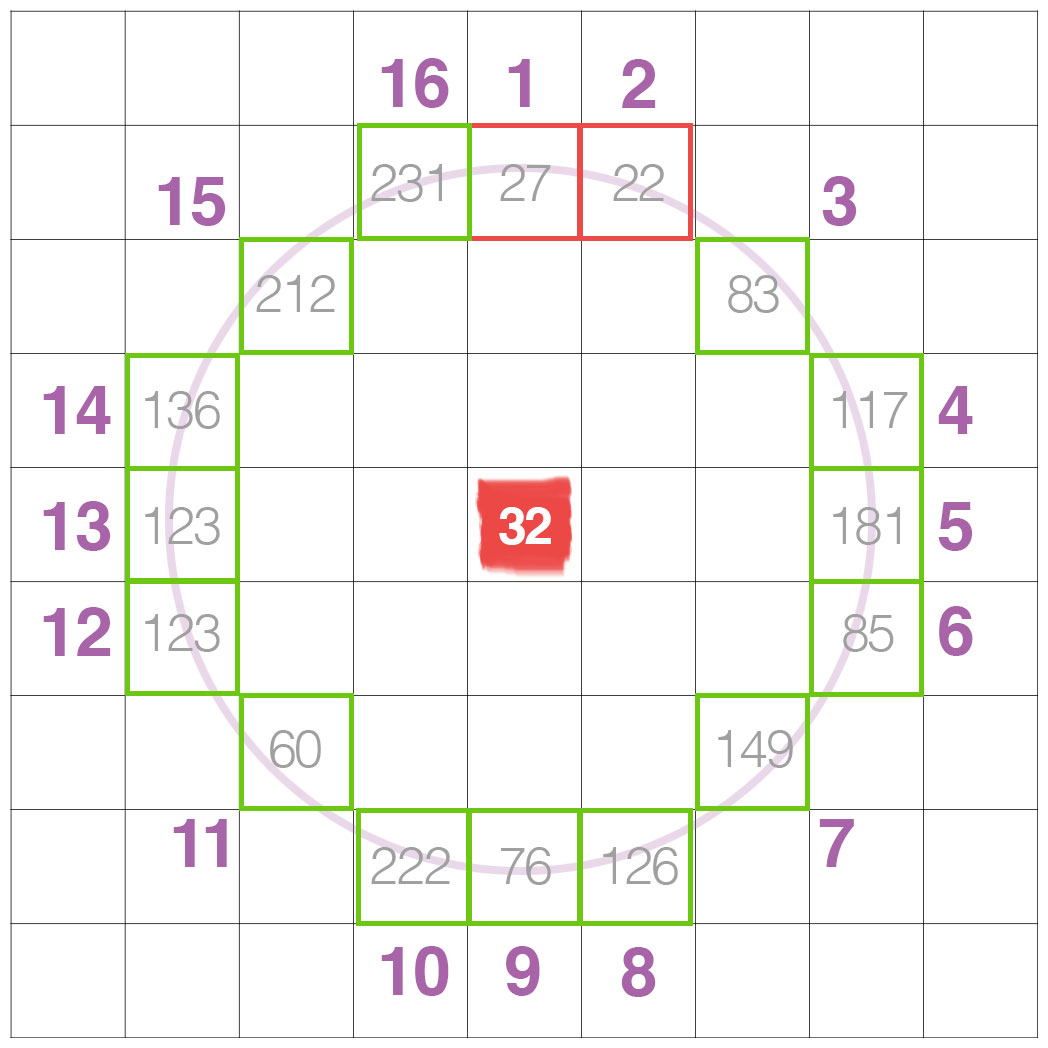
Figura 3: FAST marca esta rexión como punto clave (esquina) xa que hai 14 píxeles contiguos son máis brillantes que o píxel central.

Neste caso, vemos que hai **n = 14 píxeles** contiguos son máis brillantes que o central. Logo, **p** é considerado un punto clave.

Aínda que FAST é moi sinxelo, séguese empregando na actualidade, especialmente para aplicacións en tempo real.


## <font style="color:rgb(50,120,229)">Que detecta FAST?</font>

FAST úsase para detectar esquinas nas imaxes e indicado para aplicacións en tempo real ou con recursos computacionais limitados.

## <font style="color:rgb(50,120,229)">Exemplo de uso de FAST:</font>

FAST está implementado en OpenCV polo que o seu uso é directo. A continuación, imos ver un exemplo de código ilustrativo de como incorporar este detector na nosa apliación:

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

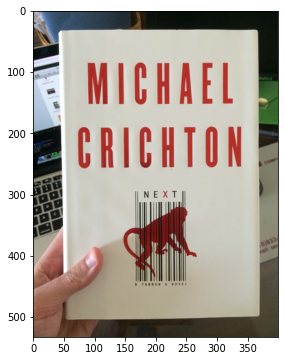

In [29]:
# Lemos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [30]:
#achamos o detector FAST
detector = cv2.FastFeatureDetector_create()
kps = detector.detect(gray, None)

print("# de keypoints: {}".format(len(kps)))

# de keypoints: 915


In [31]:
#Lazo sobre os keypoint e os marcamos na imaxe
for kp in kps:
    r = int(0.5 * kp.size)
    (x, y) = np.int0(kp.pt)
    cv2.circle(image, (x, y), r, (0, 255, 255), 2)

## <font style="color:rgb(50,120,229)">Visualizamos os resultaos </font>

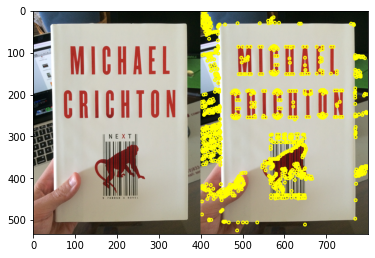

In [32]:
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));